# Physicochemical Properties of Protein Tertiary Structure Data Set

This is a data set of Physicochemical Properties of Protein Tertiary Structure. The data set is taken from CASP 5-9. There are 45730 decoys and size varying from 0 to 21 armstrong.

https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure

## Read and cleaning the data

In [1]:
import pandas as pd

#Read data
df = pd.read_csv('CASP.csv')
df.info()
df.head()

# Data is clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


## Visualizing the data

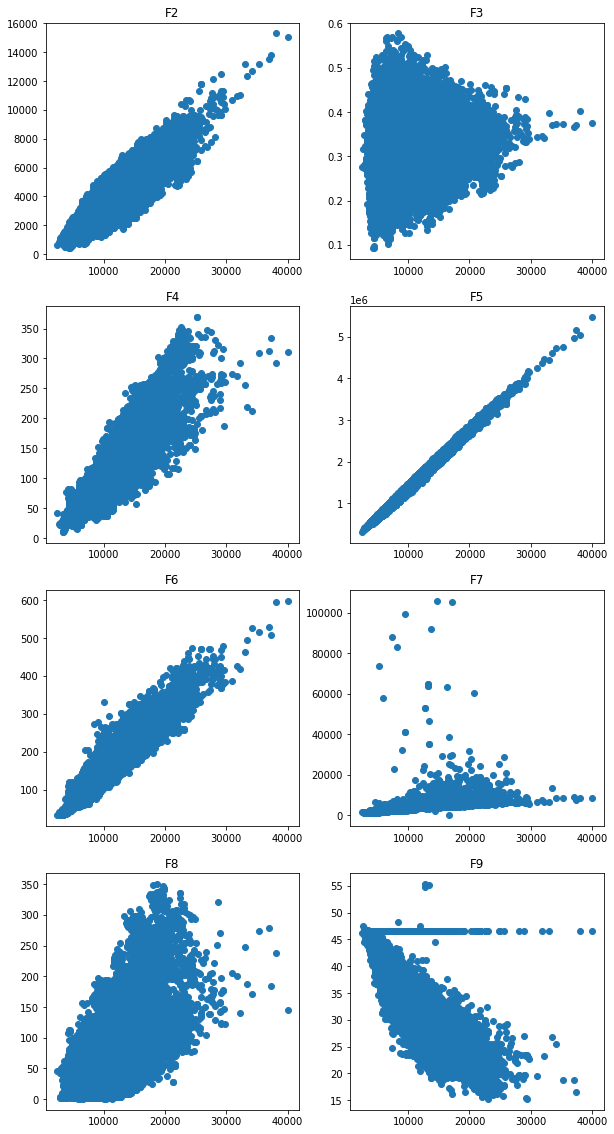

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting values
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))
col = df.columns[2:].values.reshape(ax.shape)

for row, i in zip(ax, col):
  for column, j  in zip(row, i):
    column.scatter(df['F1'], df[j])
    column.title.set_text(j)

plt.show()

## Simple Lineal Regression

### Selecting F1 and F2 features to do a simple lineal regression.

In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# separate the features who look linearly dependent
data = df[['F1', 'F2']]
x = data['F1']
y = data['F2']

# splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Reshape to (19026, 1)
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Train the model
regr.fit(x_train, y_train)

# Prediction
y_pred = regr.predict(x_test)

### Results

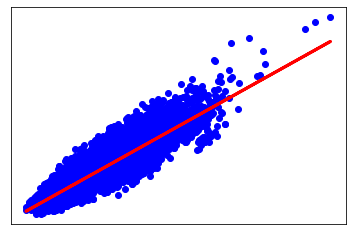

In [4]:
# Plot outputs
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
from sklearn import metrics
import numpy as np

# Make predictions using the testing set
y_pred = regr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 466.9513905588544
Mean Squared Error: 373440.0930693595
Root Mean Squared Error: 611.0974497323316


## Multiple Lineal Regression



### Visualize the data.


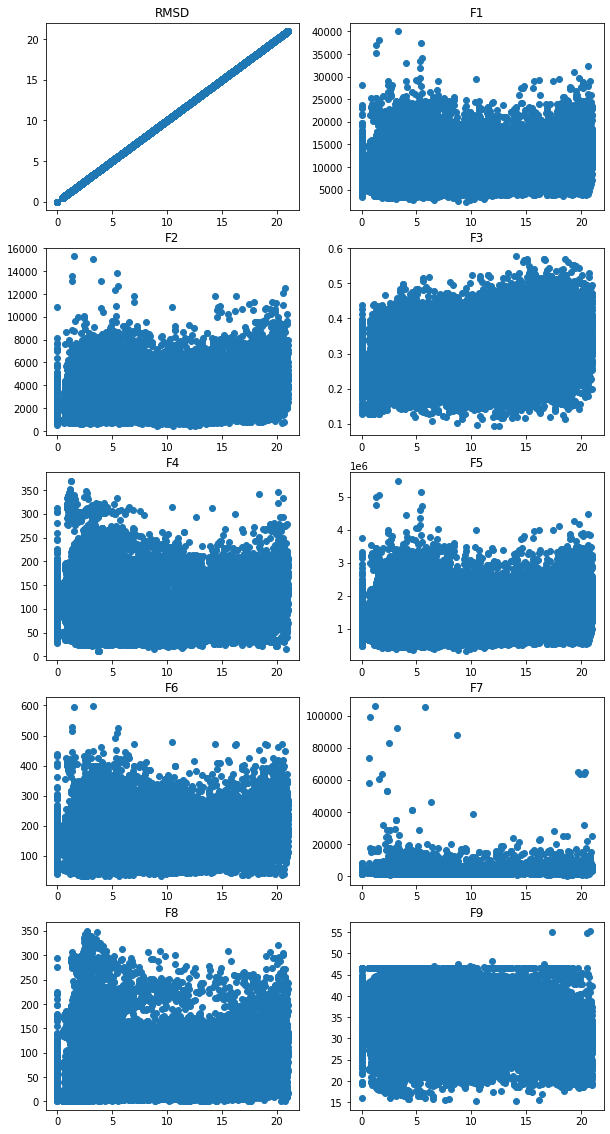

In [52]:
# plotting values
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))
col = df.columns.values.reshape(ax.shape)

for row, i in zip(ax, col):
  for column, j  in zip(row, i):
    column.scatter(df['RMSD'], df[j])
    column.title.set_text(j)

plt.show()

### Traning With all the data (RAW)

In [19]:
x = df.iloc[:,1:]
y = df['RMSD']

# splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Reshape to (19026, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Train the model
regr.fit(x_train, y_train)

# Prediction
y_pred = regr.predict(x_test)

Results

In [40]:
coeff_df = pd.DataFrame(regr.coef_.T, x.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
F1,0.001624
F2,0.001407
F3,18.086306
F4,-0.109496
F5,-0.000004
F6,-0.023779
F7,-0.000138
F8,0.015402
F9,-0.115398


In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.35310283009275
Mean Squared Error: 26.899601405792765
Root Mean Squared Error: 5.18648256584294


### Traning with normalized data

More info: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [43]:
from sklearn.preprocessing import MinMaxScaler

x = df.iloc[:,1:]
y = df['RMSD']

# splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

#normalize train and testing data
norm = MinMaxScaler().fit(x_train)
x_train = norm.transform(x_train)
X_test = norm.transform(x_test)

# Reshape to (19026, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Train the model
regr.fit(x_train, y_train)

# Prediction
y_pred = regr.predict(x_test)

Results

In [45]:
coeff_df = pd.DataFrame(regr.coef_.T, x.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
F1,61.146783
F2,20.979314
F3,8.631509
F4,-37.420479
F5,-22.454605
F6,-13.447984
F7,-14.634522
F8,5.344385
F9,-4.624328


In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 30065562.80129795
Mean Squared Error: 1054504954694764.6
Root Mean Squared Error: 32473142.051467158


### Traning with Standardization

In [48]:
from sklearn.preprocessing import StandardScaler

x = df.iloc[:,1:]
y = df['RMSD']

# splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# transform the training data column
scale = StandardScaler().fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

# Reshape to (19026, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Train the model
regr.fit(x_train, y_train)

# Prediction
y_pred = regr.predict(x_test)


In [49]:
coeff_df = pd.DataFrame(regr.coef_.T, x.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
F1,6.623777
F2,2.072134
F3,1.140133
F4,-6.083874
F5,-2.469634
F6,-1.669210
F7,-0.286435
F8,0.869492
F9,-0.691846


In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.353102830092923
Mean Squared Error: 26.89960140579279
Root Mean Squared Error: 5.186482565842942
